In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
df = pd.read_excel('EV_states_data.xlsx')

In [4]:
df.head(20)

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82
5,6,Himachal Pradesh,0,0,0,0,0,98,0,98
6,7,Jammu & Kashmir,2,76,152,0,0,208,0,438
7,8,Goa,0,0,0,0,0,513,1,514
8,9,Dadra and Nagar Haveli,4,0,9,0,0,803,0,816
9,10,Jharkhand,75,228,736,9,7,655,0,1710


In [8]:
df.shape

(30, 10)

In [9]:
print(df.dtypes)

Sl. No                                                                 int64
State                                                                 object
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules     int64
Two Wheelers (Category L2 (CMVR))                                      int64
Two Wheelers (Max power not exceeding 250 Watts)                       int64
Three Wheelers (Category L5 slow speed as per CMVR)                    int64
Three Wheelers (Category L5 as per CMVR)                               int64
Passenger Cars (Category M1 as per CMVR)                               int64
Buses                                                                  int64
Total in state                                                         int64
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              30 non-null     int64 
 1   State                                                               30 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  30 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   30 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    30 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 30 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)                            30 non-null     int64 
 7   Passenger Cars (Category M1 

In [12]:
print(df.isnull().sum())

Sl. No                                                                0
State                                                                 0
Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules    0
Two Wheelers (Category L2 (CMVR))                                     0
Two Wheelers (Max power not exceeding 250 Watts)                      0
Three Wheelers (Category L5 slow speed as per CMVR)                   0
Three Wheelers (Category L5 as per CMVR)                              0
Passenger Cars (Category M1 as per CMVR)                              0
Buses                                                                 0
Total in state                                                        0
dtype: int64


In [13]:
print(df.describe())

          Sl. No  \
count  30.000000   
mean   15.500000   
std     8.803408   
min     1.000000   
25%     8.250000   
50%    15.500000   
75%    22.750000   
max    30.000000   

       Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
count                                          30.000000                    
mean                                          918.300000                    
std                                          1482.441466                    
min                                             0.000000                    
25%                                            19.000000                    
50%                                           447.500000                    
75%                                           762.500000                    
max                                          7182.000000                    

       Two Wheelers (Category L2 (CMVR))  \
count                          30.000000   
mean                          468.966

In [14]:
print(df.duplicated().sum())

0


In [15]:
print(df.columns)

Index(['Sl. No', 'State',
       'Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules',
       'Two Wheelers (Category L2 (CMVR))',
       'Two Wheelers (Max power not exceeding 250 Watts)',
       'Three Wheelers (Category L5 slow speed as per CMVR)',
       'Three Wheelers (Category L5 as per CMVR)',
       'Passenger Cars (Category M1 as per CMVR)', 'Buses', 'Total in state'],
      dtype='object')


In [16]:
corr_matrix = df.corr()
print(corr_matrix)

                                                      Sl. No  \
Sl. No                                              1.000000   
Two Wheelers (Category L1 & L2 as per Central M...  0.695864   
Two Wheelers (Category L2 (CMVR))                   0.691450   
Two Wheelers (Max power not exceeding 250 Watts)    0.856607   
Three Wheelers (Category L5 slow speed as per C...  0.383893   
Three Wheelers (Category L5 as per CMVR)            0.191484   
Passenger Cars (Category M1 as per CMVR)            0.782560   
Buses                                               0.266009   
Total in state                                      0.912413   

                                                    Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
Sl. No                                                                                       0.695864                    
Two Wheelers (Category L1 & L2 as per Central M...                                           1.000000              

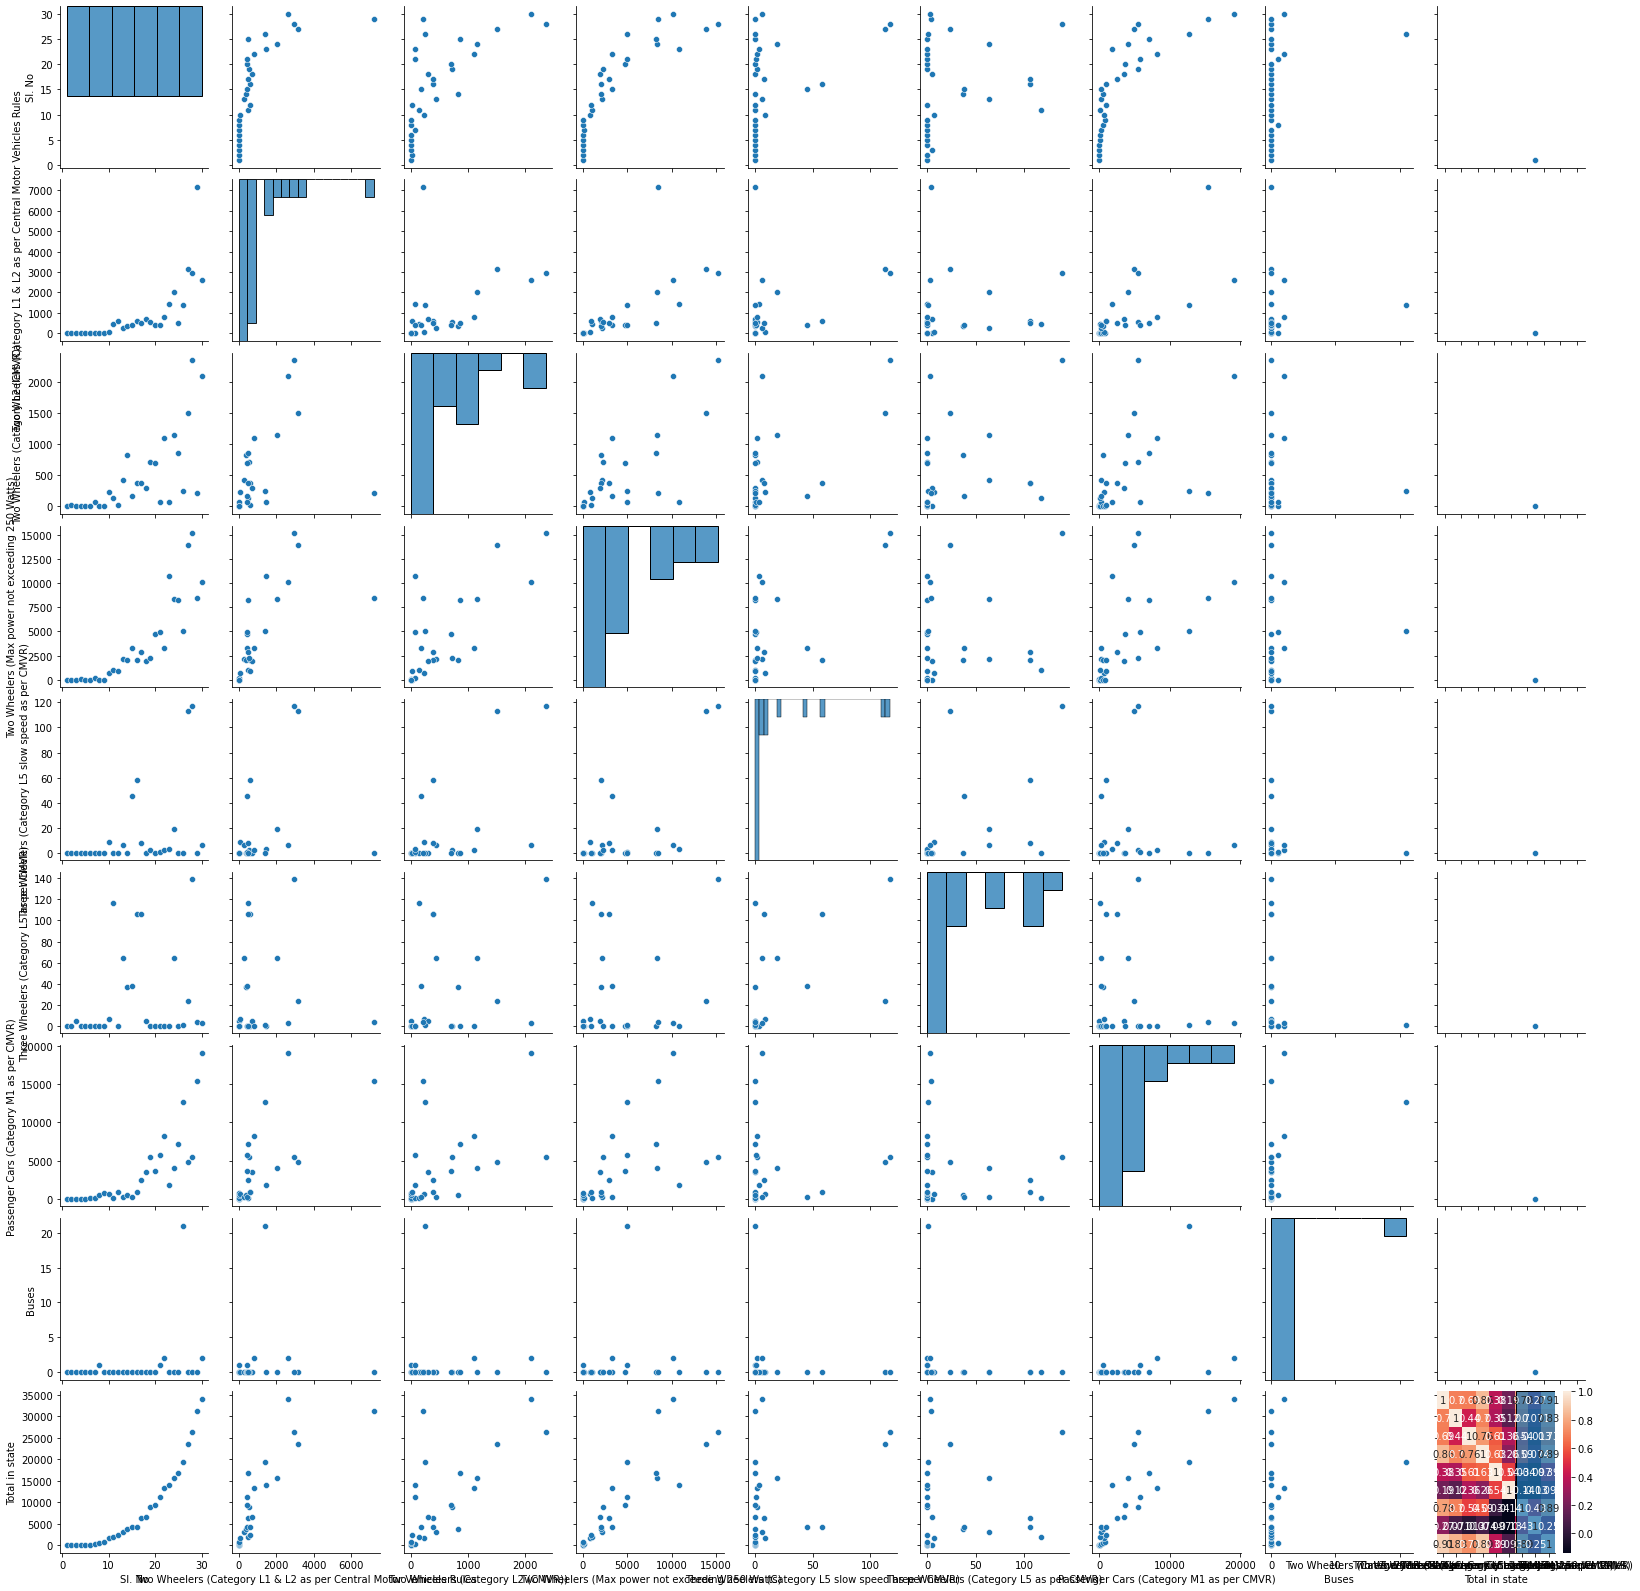

In [17]:
sns.pairplot(df)
sns.heatmap(df.corr(), annot=True)
plt.show()

We have used SelectKBest module to select the top 3 most relevant features based on the f_regression score The k parameter is set to 3 to select the top 3 features. The target variable is separated from the dataset and the features are selected using the fit_transform method

In [19]:
target = df['Total in state']
## Selecting the top 3 most relevant features using f_regression
selector = SelectKBest(f_regression, k=3)
X_new = selector.fit_transform(df.drop(['State', 'Total in state'], axis=1), target)


In [20]:
#names of the selected features
selected_features = df.drop(['State', 'Total in state'], axis=1).columns[selector.get_support()]

print('Selected Features:', list(selected_features))

Selected Features: ['Sl. No', 'Two Wheelers (Max power not exceeding 250 Watts)', 'Passenger Cars (Category M1 as per CMVR)']


In [21]:
from sklearn.cluster import KMeans

## Selecting relevant features

In [22]:
X = df[['Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', 'Two Wheelers (Category L2 (CMVR))', 'Two Wheelers (Max power not exceeding 250 Watts)', 'Three Wheelers (Category L5 slow speed as per CMVR)', 'Three Wheelers (Category L5 as per CMVR)', 'Passenger Cars (Category M1 as per CMVR)', 'Buses']]

In [23]:
# normalize the data
X = (X - X.mean()) / X.std()

Determining the optimal number of clusters using elbow method

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


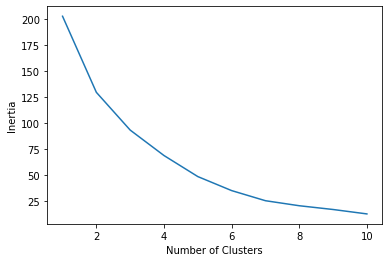

In [24]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Perform clustering with k=4

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)
df['Cluster'] = kmeans.labels_

# visualize the clusters

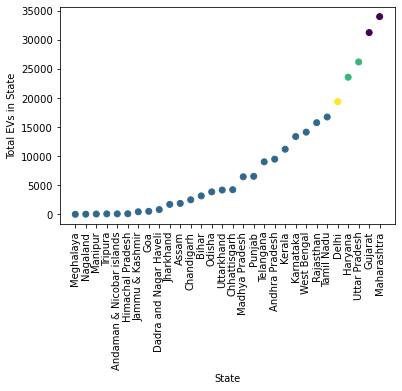

In [28]:

plt.scatter(df['State'], df['Total in state'], c=df['Cluster'])
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total EVs in State')
plt.show()

# Regression Analysis

In [51]:
from sklearn.linear_model import LinearRegression

In [56]:
df1 = pd.read_excel('EV_states_data.xlsx')

In [57]:
df1.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


drop the 'State' column

In [59]:
data = df1.drop('State', axis=1)

split data into X (input features) and y (target variable)

In [61]:
X = data.drop('Total in state', axis=1)
y = data['Total in state']

In [62]:
reg = LinearRegression().fit(X, y)

In [64]:
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [3.97613302e-13 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
Intercept: -7.275957614183426e-12


# Using Decision Trees

In [65]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [66]:
df2 = pd.read_excel('EV_states_data.xlsx')

In [68]:
# Spliting the data into features and target variable
X = df2.drop(['State', 'Total in state'], axis=1)
y = df2['Total in state']

In [69]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [70]:
# Train the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [72]:
# Evaluating the model on the testing set
score = regressor.score(X_test, y_test)
print(f"R-squared score on testing set: {score:.2f}")

R-squared score on testing set: 0.97
